# Playing around
Trying to intuitively understand Noise Interferometry in a free medium

In [4]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from NI_simulation.modules import ni_sim
from scipy import interpolate
import sys

%load_ext autoreload
%autoreload 2

In [43]:
# create sources
sources = ni_sim.source_distribution2D().donut(10000, 11000, 300)


In [44]:
env = ni_sim.environment(sources, time_length=600)

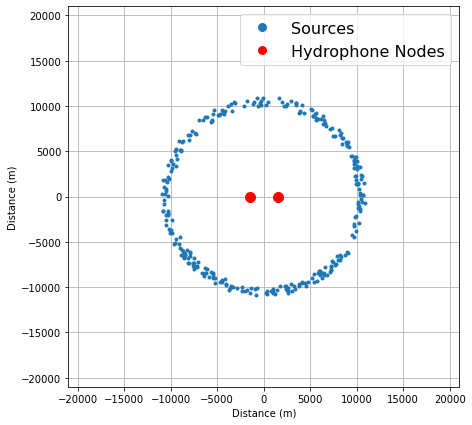

In [45]:
env.plot_env()
plt.xlim([-21000,21000])
plt.ylim([-21000,21000])
plt.grid()

In [ ]:
xA, xB = env.get_signals()

 20%|██        | 60/300 [01:56<04:58,  1.24s/it] 

In [ ]:
R = np.correlate(xA, xB, mode='full')
tx = np.linspace(-env.time_length, env.time_length, len(R))

plt.plot(tx,R)
plt.xlim([-5,5])